In [17]:
import spacy
import codecs
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nlp = spacy.load('ru_core_news_sm')


In [4]:
nlp.add_pipe('sentencizer')
nlp.disable_pipe("lemmatizer")

In [5]:
def opener(adress):
    file = codecs.open(adress, "r", "utf-8")
    text = file.read()
    file.close()
    return text    

In [6]:
def cleaner(text: str):
    new = text.replace("\n", ".").replace("\t", "").replace("\r", "").replace("\xa0", " ").replace("I", "")
    return new


In [7]:
d = {}
for filename in os.scandir("6_texts"):
        d["{}".format(filename.name)] = nlp(cleaner(opener(filename.path)))

Программа будет выводить <br>
количество простых, ССП, СПП предложений <br>
количество восклицательных и вопросительных <br>

In [9]:
conj = "хотя, несмотря на то что, так как, в связи с тем что, потому что, ибо, чтобы, для того чтобы, \
дабы, когда, в то время как, пока, до тех пор пока, едва, лишь, \
так что, как будто, чем, если, кабы, коли, чтобы"

conj_SPP = conj.split(", ")

In [10]:
def compound_finder(text):
    text = text.sents
    compound = [] #ССП
    complex = [] #СПП
    simple = []
    for sentence in text:
        n = 0
        for token in sentence:
            if (n!=1) and token.text in conj_SPP:
                complex.append(sentence)
                n+=1
            elif (token.dep_ != "ROOT") and (token.pos_ == "VERB"):
                for child in token.children:
                    if (n!=1) and (child.dep_ == "nsubj"):
                        compound.append(sentence)
                        n+=1        
            elif (n!=1) and token.dep_ == "parataxis":
                compound.append(sentence)
                n+=1
        if sentence not in (compound or complex):
            simple.append(sentence)
        
    return compound, complex, simple

In [26]:
compound = [] #соотношение ССП ко всем
compl = [] #соотношение СПП ко всем
simpl = [] #сооношение простых ко всем
for key in d.keys():
    all_sentences = [sent for sent in d[key].sents]
    a = len(compound_finder(d[key])[0])/len(all_sentences)
    b = len(compound_finder(d[key])[1])/len(all_sentences)
    c = len(compound_finder(d[key])[2])/len(all_sentences)
    compound.append(a)
    compl.append(b)
    simpl.append(c)

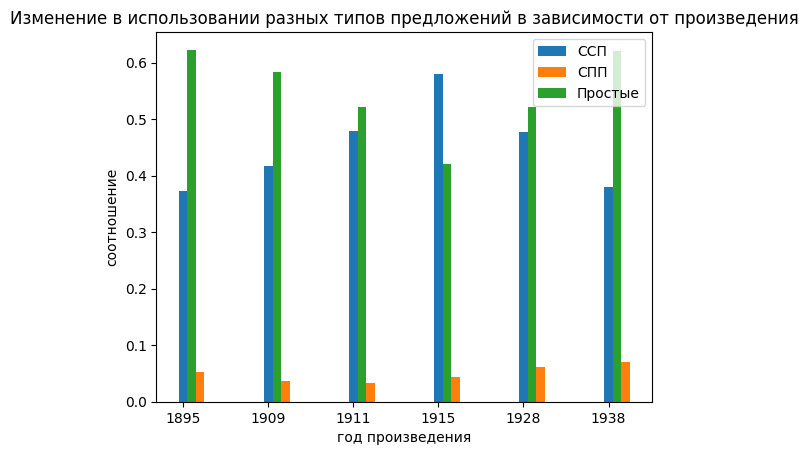

In [46]:
x_axis = np.arange(len(compound))

plt.bar(x_axis, width=0.1, height = compound,  label = "ССП")
plt.bar(x_axis + 0.2, width=0.1, height= compl, label = "СПП")
plt.bar(x_axis + 0.1, width=0.1, height=simpl, label = "Простые")

plt.xticks(x_axis, ["1895", "1909", "1911", "1915", "1928", "1938"])
plt.xlabel("год произведения")
plt.ylabel("соотношение")
plt.title("Изменение в использовании разных типов предложений в зависимости от произведения")
plt.legend()

В основном автор использует сложносочинённые предложения и простые. Причём динамика ССП сооветствует среднеквадратичному распределению, а простых - прямо пропорциональна первой.<br>
Гипотеза 1: по мере творческого пути автор начал использовать более сложные конструкции, тексты стали более замысловатыми в синтаксичнеском плане. Но к концу прозаического творчества вернулся к простому и понятному стилю.<br>
Гипотеза 2: в произведениях с высоким соотношением простых предложений больше диалогов. 

In [71]:
# количество вослицаний и вопросов
def ques_excl(text):
    exc_c = 0 #считатель восклицаний
    q_c = 0 #вопросов
    # diag_c = [] #диалогов
    all_sentences = [sent for sent in d[key].sents]
    for sentence in text.sents:
        if str(sentence[-1]) == "!":
            exc_c += 1
        elif str(sentence [-1]) == "?":
            q_c+=1
    exc_c = exc_c/len(all_sentences)
    q_c = q_c/len(all_sentences)
    return exc_c, q_c

ques_excl(d["1_anton_yabl_tok_1895.txt"])

(0.13, 0.03)

In [72]:
all_ex = []
all_q = []
for key in d.keys():
    ex = ques_excl(d[key])[0]
    all_ex.append(ex)
    q = ques_excl(d[key])[1]
    all_q.append(q)

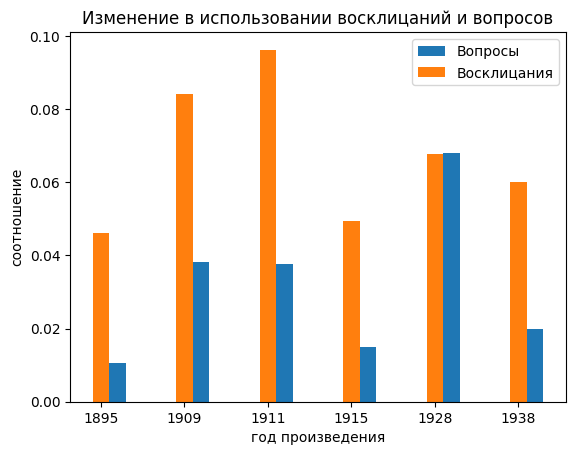

In [78]:
plt.bar(x_axis + 0.2, width=0.2, height= all_q, label = "Вопросы")
plt.bar(x_axis, width=0.2, height = all_ex,  label = "Восклицания")

plt.xticks(x_axis, ["1895", "1909", "1911", "1915", "1928", "1938"])
plt.xlabel("год произведения")
plt.ylabel("соотношение")
plt.title("Изменение в использовании восклицаний и вопросов")
plt.legend()

По соотношению восклицательных предложений можно судить об эмоциональной нагрузке текста.
В данном случае самым эмоциональным является текст "Ночной разговор"

По соотношению вопросительных предложений к обычным можно судить о наличии либо большого количества вопросов в диалогах, либо о множестве риторических вопросов. В этом плане "Жизнь Арсения" выходит на первое место. Произведение представляет собой размышления героя о жизни, что оправдывает количество вопросов.